In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
import warnings

warnings.filterwarnings('ignore')

# Descripción del dataset

La base de datos seleccionada es "Corporate Credit Rating with Financial Ratios", la cual fue obtenida de Kaggle (https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios). Esta base de datos proporciona información sobre las calificaciones crediticias corporativas emitidas por agencias especializadas entre 2010 y 2016, asi como diferentes resultados financieros de las empresas en el mismo periodo de tiempo.

# Descipcion de las variables

la base de datos contiene 25 variables, no obstante unicamente se utilizaran las siguientes 20 variables:

| Variable | Definición |
| --- | --- |
| Rating | Calificación crediticia emitida por la agencia de calificación. |
| Grado de inversión | Calificación crediticia binaria que indica si la calificación es de grado de inversión o de basura. |
| Current Ratio | Relación entre activos corrientes y pasivos corrientes. |
| Long-term Debt / Capital | Relación entre la deuda a largo plazo y el capital total de la empresa. |
| Debt/Equity Ratio | Relación entre la deuda total y el patrimonio de la empresa. |
| Gross Margin | Margen bruto de la empresa (ingresos totales menos costo de ventas). |
| Operating Margin | Margen operativo de la empresa (ingresos totales menos costos operativos). |
| EBIT Margin | Margen EBIT (ganancias antes de intereses e impuestos). |
| EBITDA Margin | Margen EBITDA (ganancias antes de intereses, impuestos, depreciación y amortización). |
| Pre-Tax Profit Margin | Margen de beneficio antes de impuestos. |
| Net Profit Margin | Margen de beneficio neto. |
| Asset Turnover | Rotación de activos (ingresos totales divididos por activos totales). |
| ROE - Return On Equity | Rentabilidad del patrimonio neto (beneficio neto dividido por patrimonio neto). |
| Return On Tangible Equity | Rentabilidad del patrimonio tangible neto. |
| ROA - Return On Assets | Rentabilidad de los activos (beneficio neto dividido por activos totales). |
| ROI - Return On Investment | Rentabilidad de la inversión (beneficio neto dividido por la inversión total). |
| Operating Cash Flow Per Share | Flujo de caja operativo por acción. |
| Free Cash Flow Per Share | Flujo de caja libre por acción. |


# Problema
El objetivo de este trabajo es simular el rol de un miembro de una empresa calificadora y desarrollar un modelo predictivo eficiente para asignar una calificación a una empresa. Para lograr esto, se buscará utilizar la menor cantidad posible de información y esfuerzo. En caso de que la empresa no alcance un grado de inversión, se pretende identificar las variables con mayor impacto y proporcionar recomendaciones para mejorar la calificación.

# Objetivos
## Objetivo General
* El objetivo general de este trabajo es desarrollar un modelo capaz de identificar, con la menor cantidad posible de información financiera, a qué grupo podría pertenecer una empresa.

## Objetivos Especificos
* Recolectar y seleccionar los datos financieros relevantes para el modelo predictivo, considerando que la cantidad de información debe ser mínima pero suficiente para hacer una predicción acertada.
* Realizar un análisis exploratorio de los datos recolectados para identificar patrones, tendencias y posibles relaciones entre las variables financieras y la calificación de la empresa.
* Seleccionar y aplicar las técnicas de análisis y modelado de datos más adecuadas para construir un modelo predictivo eficiente, considerando la complejidad de los datos y la necesidad de mantener la simplicidad del modelo.
* Evaluar la precisión y la eficiencia del modelo construido mediante la realización de pruebas y validaciones utilizando datos reales y comparando las predicciones del modelo con las calificaciones reales de las empresas.
* Identificar las variables financieras que tienen un mayor impacto en la calificación de una empresa y elaborar recomendaciones específicas para mejorar las áreas críticas.

# Hipotesis
Las hipotesis que se quiere resolver son:

* Existe una relación entre las variables financieras de una empresa y su calificación crediticia.
* Algunas variables financieras tienen un mayor impacto en la calificación crediticia de una empresa que otras.
* Un modelo predictivo puede ser construido utilizando técnicas de análisis y modelado de datos para predecir la calificación crediticia de una empresa con precisión aceptable, incluso cuando se dispone de una cantidad limitada de información financiera.
* El modelo predictivo puede ser utilizado para identificar las áreas críticas de una empresa que necesitan mejoras para aumentar su calificación crediticia.
* Las recomendaciones específicas proporcionadas por el modelo predictivo pueden ser útiles para las empresas en la toma de decisiones financieras y para mejorar su situación crediticia en general.

# Análisis de los datos

## Carga de datos

In [228]:
df =  pd.read_csv('CCR.csv',sep=',');

df.drop(['Rating Agency', 'Corporation', 'Sector','Rating Date', 'CIK', 'SIC Code', 'Ticker'], axis=1, inplace=True)

In [229]:
new_names = {
    'Rating': 'Rating',
    'Binary Rating': 'Investment_grade',
    'Current Ratio': 'CR',
    'Long-term Debt / Capital': 'LTDtC',
    'Debt/Equity Ratio': 'DtE',
    'Gross Margin': 'GM',
    'Operating Margin': 'OM',
    'EBIT Margin': 'EBIT',
    'EBITDA Margin': 'EBITDA',
    'Pre-Tax Profit Margin': 'PtPM',
    'Net Profit Margin': 'NetPM',
    'Asset Turnover': 'AT',
    'ROE - Return On Equity': 'ROE',
    'Return On Tangible Equity': 'ROTE',
    'ROA - Return On Assets': 'ROA',
    'ROI - Return On Investment': 'ROI',
    'Operating Cash Flow Per Share': 'OCFpS',
    'Free Cash Flow Per Share': 'FCFpS',
}

df.rename(columns=new_names, inplace=True)
df.columns

Index(['Rating', 'Investment_grade', 'CR', 'LTDtC', 'DtE', 'GM', 'OM', 'EBIT',
       'EBITDA', 'PtPM', 'NetPM', 'AT', 'ROE', 'ROTE', 'ROA', 'ROI', 'OCFpS',
       'FCFpS'],
      dtype='object')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rating            7805 non-null   object 
 1   Investment_grade  7805 non-null   int64  
 2   CR                7805 non-null   float64
 3   LTDtC             7805 non-null   float64
 4   DtE               7805 non-null   float64
 5   GM                7805 non-null   float64
 6   OM                7805 non-null   float64
 7   EBIT              7805 non-null   float64
 8   EBITDA            7805 non-null   float64
 9   PtPM              7805 non-null   float64
 10  NetPM             7805 non-null   float64
 11  AT                7805 non-null   float64
 12  ROE               7805 non-null   float64
 13  ROTE              7805 non-null   float64
 14  ROA               7805 non-null   float64
 15  ROI               7805 non-null   float64
 16  OCFpS             7805 non-null   float64


# Descripcion de los datos

In [281]:
df.drop(['Rating', 'Investment_grade'], axis=1).describe()[1:].T

,mean,std,min,25%,50%,75%,max
CR,1.926313,1.921651,0.1749,1.0773,1.4968,2.1610,34.0768
LTDtC,0.452804,2.629158,-86.3636,0.2865,0.4272,0.5422,171.5000
DtE,0.177349,34.456334,-1473.0980,0.4197,0.7528,1.2116,194.3750
GM,42.433909,23.742020,-87.6840,22.4539,39.6354,59.6417,100.0000
OM,11.531612,25.469044,-461.7878,6.0982,12.1201,19.4646,93.9930
EBIT,11.582683,25.483934,-461.7878,6.1811,12.1558,19.5399,93.9930
EBITDA,20.071493,24.380407,-360.8169,11.1621,18.3045,30.6616,286.4935
PtPM,8.659944,27.866408,-476.0100,4.0087,9.7051,16.6769,221.2894
NetPM,5.995566,24.055577,-414.8248,2.6371,6.9389,12.3667,219.3903
AT,0.849843,0.696204,0.0684,0.3995,0.6612,1.0388,8.5039


# Preprocesamiento de Datos.

In [231]:
rating_dict = {'AAA': 21, 'AA+': 20, 'AA': 19, 'AA-': 18, 'A+': 17, 'A': 16, 'A-': 15,
               'BBB+': 14, 'BBB': 13, 'BBB-': 12, 'BB+': 11, 'BB': 10, 'BB-': 9,
               'B+': 8, 'B': 7, 'B-': 6, 'CCC+': 5, 'CCC': 4, 'CCC-': 3, 'CC': 2, 'CC+': 2,
               'C': 1, 'D': 0}

df['Rating'] = df['Rating'].map(rating_dict)

In [232]:
X = df.drop(['Rating', 'Investment_grade'], axis=1).copy().values
yR = df['Rating'].copy().values
yI = df['Investment_grade'].copy().values
X_label = df.drop(['Rating', 'Investment_grade'], axis=1).columns

## Escalamiento de datos

In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## disminucion de la dimensionalidad

In [234]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit_transform(X)
X_pca = pca.transform(X)
pca.explained_variance_ratio_.cumsum()

array([0.35146277, 0.45636157, 0.54795216, 0.63400083, 0.70209944,
       0.76652043, 0.82781884, 0.88164978, 0.9152053 , 0.94679648,
       0.97113159, 0.98600138, 0.99451514, 0.99812996, 0.99998154,
       1.        ])

vemos que con 5 caracteristicas ya tenemos mas del 70% de la varianza de los datos, por lo que reduciremos las caracteristicas a esta cantidad.

In [235]:
X = X_pca[:, :5]

## Division de los datos

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, yR_train, yR_test, yI_train, yI_test = train_test_split(X, yR, yI, stratify=yI, test_size=0.3)

In [263]:
print(np.bincount(yI_train))
print(np.bincount(yI_test))

[1894 3569]
[ 812 1530]


# Procesamiento de datos

## Modelo 1 Regresion Lineal

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2],
    'positive': [True, False]
}

grid_LR = GridSearchCV(LinearRegression(),
                       param_grid=param_grid,
                       verbose=1,
                       return_train_score=True)

grid_LR.fit(X_train, yI_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [239]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

print(grid_LR.best_params_)
print(grid_LR.best_score_)
print("Mean Squared Error (MSE):", mean_squared_error(yI_test, grid_LR.predict(X_test)))
print("R^2 Score:", r2_score(yI_test, grid_LR.predict(X_test)))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
0.045441527366487544
Mean Squared Error (MSE): 0.21396952022575286
R^2 Score: 0.055334109649758156


## Modelo 2 Regresion logistica

In [240]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [2**i for i in range(-5, 7, 2)],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

grid_LogR = GridSearchCV(LogisticRegression(),
                       param_grid=param_grid,
                       verbose=1,
                       return_train_score=True)

grid_LogR.fit(X_train, yI_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [241]:
print(grid_LogR.best_params_)
print(grid_LogR.best_score_)
print(accuracy_score(yI_test, grid_LogR.predict(X_test)))

{'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}
0.695038691104565
0.6964133219470539


In [290]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(yI_test, grid_LogR.predict(X_test))
confusion_df = pd.DataFrame(confusion_mat, index=['GE', 'GI'], columns=['GE', 'GI'])
confusion_df

,GE,GI
GE,148,664
GI,47,1483


## Modelo 3: Random Forest

In [243]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [500],  # Número de árboles en el bosque
    'max_depth': [20],  # Profundidad máxima de cada árbol
    'min_samples_split': [2],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1]  # Número mínimo de muestras requeridas en cada hoja del árbol
}

grid_RF = GridSearchCV(RandomForestClassifier(),
                       param_grid=param_grid,
                       verbose=1,
                       return_train_score=True)

grid_RF.fit(X_train, yI_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [500]},
             return_train_score=True, verbose=1)

In [244]:
print(grid_RF.best_params_)
print(grid_RF.best_score_)
print(accuracy_score(yI_test, grid_RF.predict(X_test)))

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
0.8801009755721558
0.8932536293766012


In [272]:
confusion_mat = confusion_matrix(yI_test, grid_RF.predict(X_test))
confusion_df = pd.DataFrame(confusion_mat, index=['GE', 'GI'], columns=['GE', 'GI'])
confusion_df

,GE,GI
GE,667,145
GI,105,1425


## Modelo 4: SVG Lineal

In [246]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [2**i for i in range(-5, 7, 2)],
              'gamma': [2**i for i in range(-5, 7, 2)]}

grid_SVCL = GridSearchCV(SVC(kernel='linear'),
                        param_grid=param_grid,
                        verbose=1,
                        return_train_score=True)

grid_SVCL.fit(X_train, yI_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.03125, 0.125, 0.5, 2, 8, 32],
                         'gamma': [0.03125, 0.125, 0.5, 2, 8, 32]},
             return_train_score=True, verbose=1)

In [247]:
from sklearn.metrics import accuracy_score

print(grid_SVCL.best_params_)
print(grid_SVCL.best_score_)
print(accuracy_score(yI_test, grid_SVCL.predict(X_test)))

{'C': 0.125, 'gamma': 0.03125}
0.6644705401338521
0.6669513236549958


In [248]:
confusion_mat = confusion_matrix(yI_test, grid_SVCL.predict(X_test))
confusion_df = pd.DataFrame(confusion_mat, index=['GE', 'GI'], columns=['GE', 'GI'])
confusion_df

,GE,GI
GE,46,766
GI,14,1516


# Modelo 5: KNN

In [249]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [*range(1, 21, 1)]}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, param_grid, cv=10)

grid_knn.fit(X_train, yI_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [250]:
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)
print(accuracy_score(yI_test, grid_knn.predict(X_test)))

KNeighborsClassifier(n_neighbors=1)
0.8726004647394043
0.8804440649017934


In [251]:
confusion_mat = confusion_matrix(yI_test, grid_knn.predict(X_test))
confusion_df = pd.DataFrame(confusion_mat, index=['GE', 'GI'], columns=['GE', 'GI'])
confusion_df

,GE,GI
GE,658,154
GI,126,1404


## Modelo 6: SVG rbf

In [252]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [2**i for i in range(-5, 7, 2)],
              'gamma': [2**i for i in range(-5, 7, 2)]}

grid_SVCrbf = GridSearchCV(SVC(kernel='rbf'),  # Cambio a kernel='rbf'
                        param_grid=param_grid,
                        verbose=1,
                        return_train_score=True)

grid_SVCrbf.fit(X_train, yI_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.03125, 0.125, 0.5, 2, 8, 32],
                         'gamma': [0.03125, 0.125, 0.5, 2, 8, 32]},
             return_train_score=True, verbose=1)

In [253]:
print(grid_SVCrbf.best_estimator_)
print(grid_SVCrbf.best_score_)
print(accuracy_score(yI_test, grid_SVCrbf.predict(X_test)))

SVC(C=32, gamma=32)
0.8533793135805944
0.874466268146883


In [254]:
confusion_mat = confusion_matrix(yI_test, grid_SVCrbf.predict(X_test))
confusion_df = pd.DataFrame(confusion_mat, index=['GE', 'GI'], columns=['GE', 'GI'])
confusion_df

,GE,GI
GE,612,200
GI,94,1436


## Modelo 7: K-Means

In [264]:
def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [265]:
def plot_extern_metric(X, y, metric, metric_name):
  scores = []
  for i in range(2,20):
    model = KMeans(n_clusters=i)
    model.fit(X)
    y_pred = model.predict(X)
    scores.append(metric(y, y_pred))

  plot_metric(range(2, 20), scores, metric_name) 

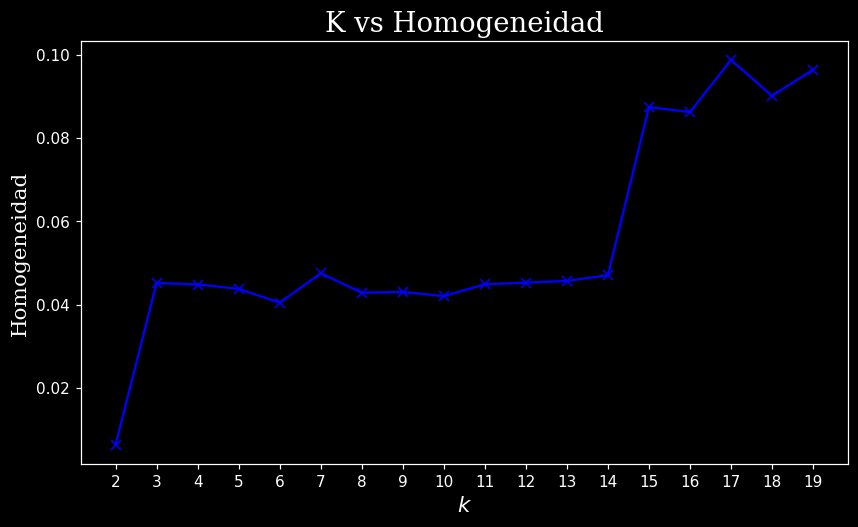

In [266]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, mutual_info_score, adjusted_rand_score

plot_extern_metric(X, yI, homogeneity_score, 'Homogeneidad')

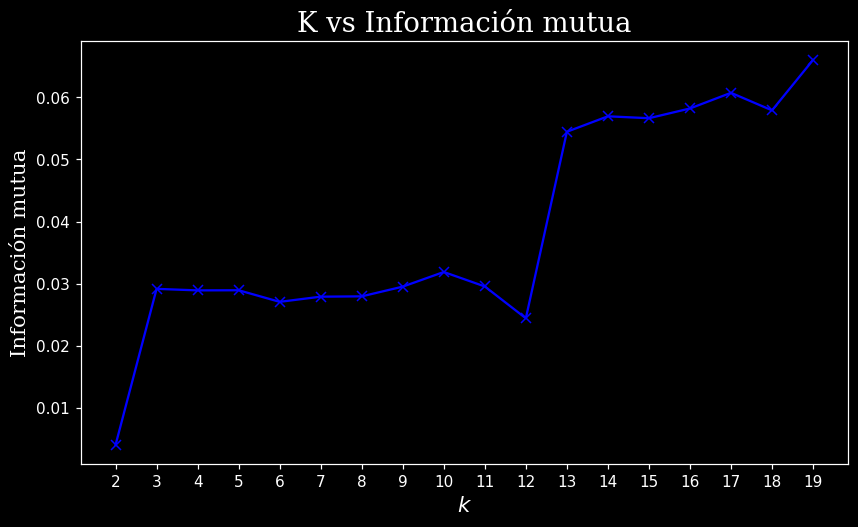

In [267]:
plot_extern_metric(X, yI, mutual_info_score, 'Información mutua')

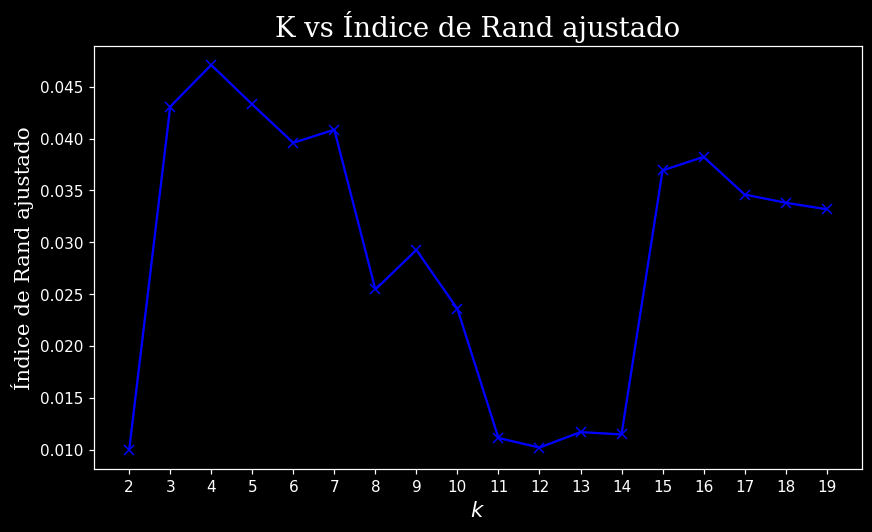

In [268]:
plot_extern_metric(X, yI,adjusted_rand_score, 'Índice de Rand ajustado')

In [284]:
from sklearn.metrics.cluster import contingency_matrix

def show_contigency_matrix(X, y, n_clusters, classes):
  # Fijamos la semilla aleatoria para obtener resultados reproducibles.
  model = KMeans(n_clusters)
  model.fit(X)
  y_pred = model.predict(X)
  mat = contingency_matrix(y, y_pred)
  columns = ['Cluster ' + str(i) for i in range(n_clusters)]
  
  # Se retorna cómo un DataFrame de Pandas para mejorar la visualización.
  return pd.DataFrame(mat, columns=columns, index=classes)

In [289]:
show_contigency_matrix(X, yI, 15, ['GE', 'GI'])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14
GE,741,245,16,3,94,1,1314,0,9,14,208,1,9,30,21
GI,1873,434,1,0,47,1,1800,11,1,9,905,0,2,6,9
